## UmojaHack Africa 2021 #3: Financial Resilience Challenge (BEGINNER) by UmojaHack Africa

Can you predict if an individual will be able to make a payment in an emergency situation?

The objective of this challenge is to build a machine learning model to predict which individuals across Africa and around the world are most likely to be financially resilient.


![Umoja Hack](https://zindpublic.blob.core.windows.net/public/uploads/competition/image/151/thumb_cdf71374-9857-44bb-8216-5f8c67afb51f.png)

This is a simple Python starter notebook to get you started with the Financial Resilience Challenge.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature engineering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

In [506]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('max_colwidth', 500)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [507]:
# Load files
train_df = pd.read_csv('FinancialResilience/Train.csv')
test_df = pd.read_csv('FinancialResilience/Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')
variable_definations = pd.read_csv('VariableDefinitions.csv')
combine = [train_df, test_df]

In [508]:
# Preview the first five rows of the train set
train_df.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),25550170.0,66.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),4591023.0,44.0,2,NaN,NaN,2.0,2.0,...,1,2,NaN,2,2,2.0,1.0,1.0,1.0,1
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),25550170.0,29.0,1,1.0,1.0,2.0,2.0,...,1,1,2.0,2,2,2.0,NaN,1.0,1.0,0
3,ID_0000144505,Canada,High income: OECD,30491168.0,44.0,1,1.0,1.0,1.0,1.0,...,1,1,2.0,1,2,NaN,NaN,1.0,NaN,1
4,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),93002320.0,36.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,1


In [509]:
# Preview the first five rows of the test set
test.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28
0,ID_0000005111,Croatia,Europe & Central Asia (excluding high income),3557444.5,62.0,2,NaN,NaN,2.0,2.0,...,2.0,2,1,1.0,2,2,2.0,NaN,1.0,1.0
1,ID_0000389416,Kazakhstan,Europe & Central Asia (excluding high income),12920168.0,32.0,2,NaN,NaN,NaN,NaN,...,2.0,2,2,NaN,2,2,2.0,2.0,1.0,2.0
2,ID_0000634789,Costa Rica,Latin America & Caribbean (excluding high income),3791520.0,73.0,1,1.0,1.0,2.0,2.0,...,2.0,2,2,NaN,2,1,2.0,1.0,1.0,1.0
3,ID_0000778100,Japan,High income: OECD,110566824.0,67.0,1,1.0,1.0,1.0,2.0,...,NaN,1,1,2.0,1,1,NaN,NaN,1.0,NaN
4,ID_0001123210,Morocco,Middle East & North Africa (excluding high income),25550170.0,32.0,1,1.0,1.0,2.0,2.0,...,1.0,2,2,NaN,2,2,2.0,2.0,1.0,1.0


In [510]:
# Preview the first five rows of the sample submission file
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104867 entries, 0 to 104866
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           104867 non-null  object 
 1   country      104867 non-null  object 
 2   region       104188 non-null  object 
 3   population   104867 non-null  float64
 4   age          104580 non-null  float64
 5   Q1           104867 non-null  int64  
 6   Q2           47721 non-null   float64
 7   Q3           45214 non-null   float64
 8   Q4           57445 non-null   float64
 9   Q5           57445 non-null   float64
 10  Q6           104867 non-null  int64  
 11  Q7           20641 non-null   float64
 12  Q8           59029 non-null   float64
 13  Q9           59029 non-null   float64
 14  Q10a         104867 non-null  int64  
 15  Q10b         104867 non-null  int64  
 16  Q11          104867 non-null  int64  
 17  Q12          104867 non-null  int64  
 18  Q13a         104867 non-

In [511]:
# Check the shape of the train and test sets
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (104867, 36)
The shape of the test set is: (44943, 35)


### Check for missing values

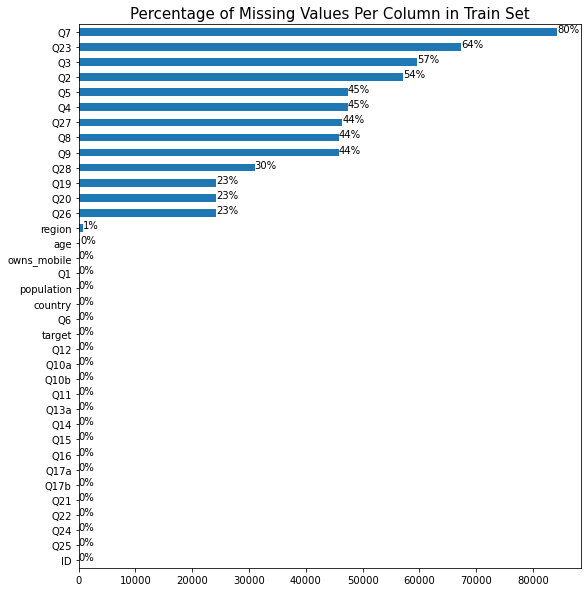

In [512]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

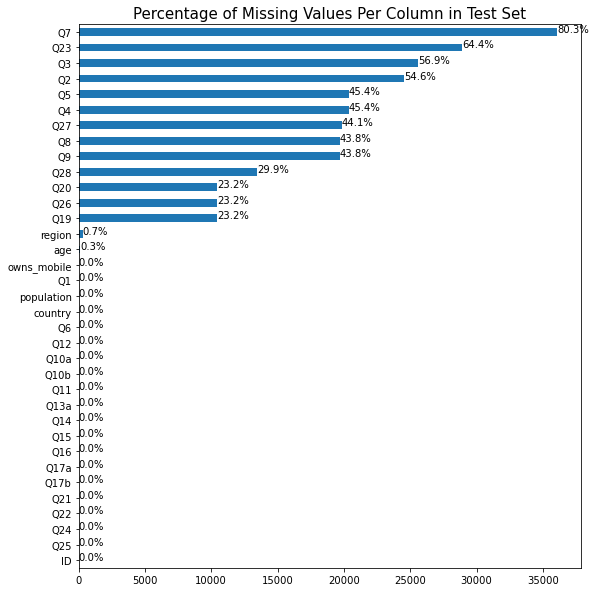

In [513]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [514]:
# Check for duplicates
train_df.duplicated().any(), test.duplicated().any()

(False, False)

In [515]:
train_df.describe()

,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
count,1.048670e+05,104580.000000,104867.000000,47721.000000,45214.000000,57445.000000,57445.000000,104867.000000,20641.000000,59029.000000,...,104867.000000,104867.000000,37580.000000,104867.000000,104867.000000,80694.000000,58429.000000,104866.000000,73862.000000,104867.000000
mean,6.728827e+07,41.820922,1.556000,1.060078,1.297784,1.618835,1.556202,1.818542,1.153772,1.220485,...,1.432052,1.650252,1.745796,1.861930,1.880801,1.855565,1.846378,1.176377,1.125586,0.581794
std,2.095529e+08,17.823733,0.522745,0.274234,0.466056,0.496068,0.509122,0.429471,0.372760,0.439298,...,0.516419,0.498633,0.452266,0.375167,0.357280,0.375795,0.393282,0.394253,0.343106,0.493267
min,3.739912e+05,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.335264e+06,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,9.386639e+06,39.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,3.051912e+07,55.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,1.134634e+09,99.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [516]:
train_df.describe(include=['O'])

,ID,country,region
count,104867,104867,104188
unique,104867,144,8
top,ID_7042704497,Morocco,Sub-Saharan Africa (excluding high income)
freq,1,3514,23893


In [517]:
# Preview variable definations
variable_definations

,ID,Person unique/random identification,"For columns(Q1 - Q28), Value 1 - Yes, 2 - No, 3-Don’t Know 4 - refused to answer"
0,country,The country,NaN
1,region,"Region of a given country,.i.e., South Asia, Europe, etc",NaN
2,population,The population of the given country,NaN
3,age,Individual age,NaN
4,Q1,Has ATM/debit card,NaN
5,Q2,Is the ATM connect to an account with your name?,NaN
6,Q3,Purchased with the ATM,NaN
7,Q4,Use of mobile or internet to make payments or send money,NaN
8,Q5,Mobile/internet to check account balance,NaN
9,Q6,Has a credit card,NaN


## Distribution of the target variable

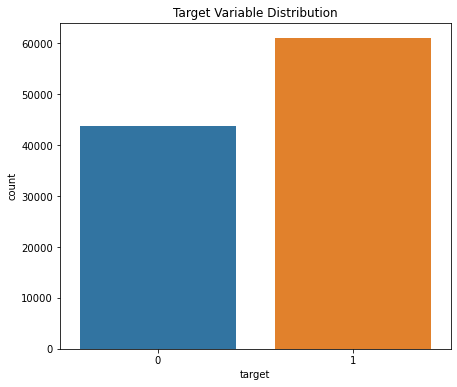

In [518]:
plt.figure(figsize=(7, 6))
sns.countplot(train.target)
plt.title('Target Variable Distribution');

This shows us that the target (Can you make a payment if you were in an emergency) is fairly balanced. The majority class in this dataset are people who can make a payment incase of an emergency

[Text(0, 0, 'Yes'),
 Text(1, 0, 'No'),
 Text(2, 0, 'Don"t Know'),
 Text(3, 0, 'Refused to answer')]

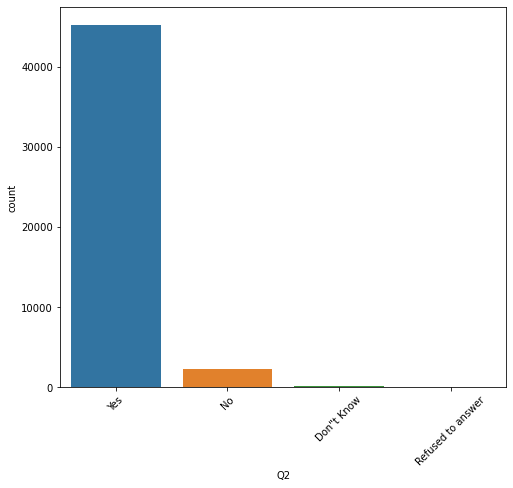

In [519]:
# Q1 - Has ATM/debit card
plt.figure(figsize=(8, 7))
ax =sns.countplot(train_df.Q2)
ax.set_xticklabels(['Yes', 'No', 'Don"t Know', 'Refused to answer'], rotation=45 )


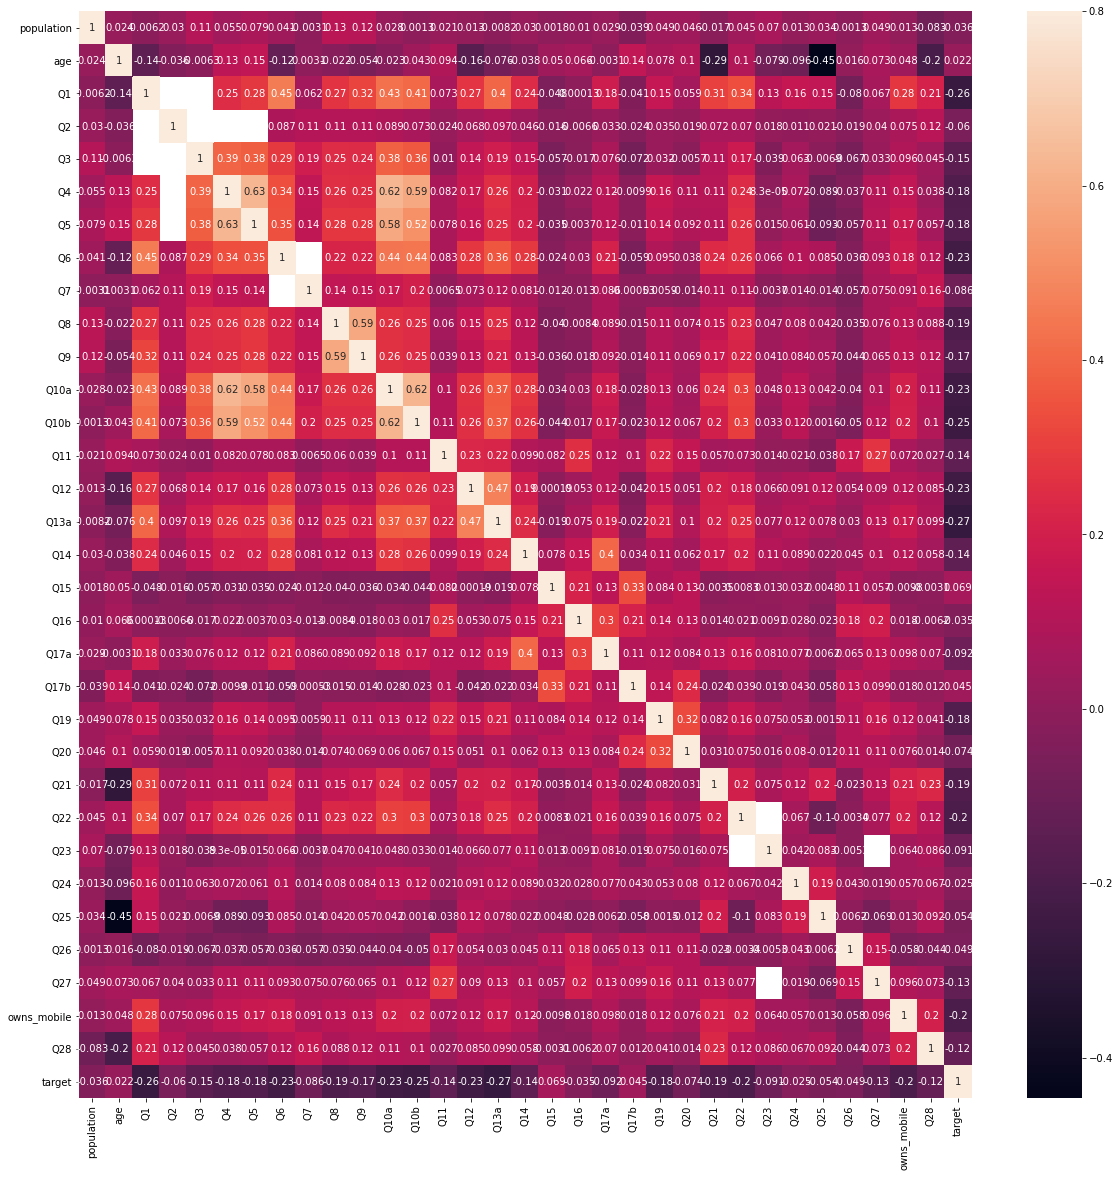

In [520]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8,annot=True);

This shows that most people do not own a debit or ATM card

In [521]:
train_df[['country', 'target']].groupby(['country'], as_index=False).mean().sort_values(by='target', ascending=False)

,country,target
99,Norway,0.945428
121,Sweden,0.904628
34,Denmark,0.901615
45,Germany,0.889855
119,Spain,0.887538
...,...,...
72,Lesotho,0.288618
118,South Sudan,0.253256
15,Botswana,0.229970
85,Mexico,0.216374


In [522]:
train_df[['region', 'target']].groupby(['region'], as_index=False).mean().sort_values(by='target', ascending=False)

,region,target
2,High income: OECD,0.772650
1,Europe & Central Asia (excluding high income),0.657635
3,High income: nonOECD,0.629898
0,East Asia & Pacific (excluding high income),0.553039
5,Middle East & North Africa (excluding high income),0.547476
6,South Asia,0.532864
4,Latin America & Caribbean (excluding high income),0.452011
7,Sub-Saharan Africa (excluding high income),0.445361


In [523]:
region_mapping={"High income: OECD" : 1,"Europe & Central Asia (excluding high income)" :2,"High income: nonOECD " :3,"East Asia & Pacific (excluding high income)":4,"Middle East & North Africa (excluding high income)":5, "South Asia":6,"Latin America & Caribbean (excluding high income)":7,"Sub-Saharan Africa (excluding high income)" :8}
for dataset in combine:
    dataset['region'] = dataset['region'].map(region_mapping)
    dataset['region'] = dataset['region'].fillna(0)
train_df.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,5.0,25550170.0,66.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,0
1,ID_0000075765,Lebanon,5.0,4591023.0,44.0,2,NaN,NaN,2.0,2.0,...,1,2,NaN,2,2,2.0,1.0,1.0,1.0,1
2,ID_0000085491,Morocco,5.0,25550170.0,29.0,1,1.0,1.0,2.0,2.0,...,1,1,2.0,2,2,2.0,NaN,1.0,1.0,0
3,ID_0000144505,Canada,1.0,30491168.0,44.0,1,1.0,1.0,1.0,1.0,...,1,1,2.0,1,2,NaN,NaN,1.0,NaN,1
4,ID_0000214184,Mexico,7.0,93002320.0,36.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,1


In [524]:
train_df[['population', 'target']].groupby(['population'], as_index=False).mean().sort_values(by='target', ascending=False)

,population,target
38,4300062.0,0.945428
70,8180019.0,0.904628
49,4780077.0,0.901615
132,71846928.0,0.889855
118,39580536.0,0.887538
...,...,...
10,1420766.0,0.288618
59,7108488.0,0.253256
11,1538662.0,0.229970
133,93002320.0,0.216374


In [525]:
train_df[['age', 'target']].groupby(['age'], as_index=False).mean().sort_values(by='target', ascending=False)

,age,target
83,98.0,0.739130
24,39.0,0.643467
16,31.0,0.642946
41,56.0,0.641280
19,34.0,0.640625
...,...,...
84,99.0,0.391892
0,15.0,0.376022
78,93.0,0.272727
81,96.0,0.250000


In [526]:
train_df[['Q1', 'target']].groupby(['Q1'], as_index=False).mean().sort_values(by='target', ascending=False)

,Q1,target
0,1,0.724670
3,4,0.566964
1,2,0.463494
2,3,0.349719


In [527]:
train_df[['Q2', 'target']].groupby(['Q2'], as_index=False).mean().sort_values(by='target', ascending=False)

,Q2,target
0,1.0,0.730990
1,2.0,0.622202
3,4.0,0.597701
2,3.0,0.478495


In [528]:
train_df[['Q3', 'target']].groupby(['Q3'], as_index=False).mean().sort_values(by='target', ascending=False)

,Q3,target
0,1.0,0.773343
3,4.0,0.769231
1,2.0,0.629663
2,3.0,0.530303


In [529]:
train_df[['Q4', 'target']].groupby(['Q4'], as_index=False).mean().sort_values(by='target', ascending=False)

,Q4,target
0,1.0,0.809158
3,4.0,0.755556
1,2.0,0.635905
2,3.0,0.481013


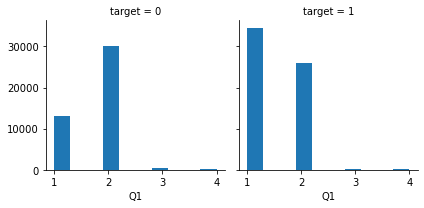

In [530]:
g = sns.FacetGrid(train_df, col='target')
g.map(plt.hist, 'Q1', bins=10)

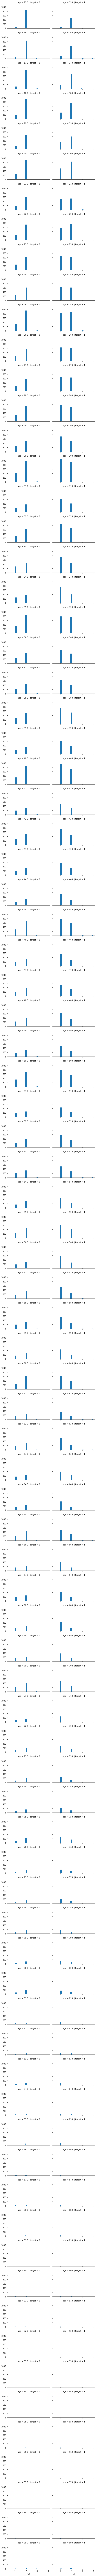

In [531]:
grid = sns.FacetGrid(train_df, col='target', row='age', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Q1', alpha=1, bins=20)
grid.add_legend();

In [532]:
# Category columns
for data in combine:
 cat_cols = ['country','region', 'owns_mobile'] + [x for x in data.columns if x.startswith('Q')]
 num_cols = ['age', 'population']

# Change columns to their respective datatypes
for data in combine:
 data[cat_cols] = data[cat_cols].astype('category')

# Confirm whether the changes have been successful
combine[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104867 entries, 0 to 104866
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   ID           104867 non-null  object  
 1   country      104867 non-null  category
 2   region       104867 non-null  category
 3   population   104867 non-null  float64 
 4   age          104580 non-null  float64 
 5   Q1           104867 non-null  category
 6   Q2           47721 non-null   category
 7   Q3           45214 non-null   category
 8   Q4           57445 non-null   category
 9   Q5           57445 non-null   category
 10  Q6           104867 non-null  category
 11  Q7           20641 non-null   category
 12  Q8           59029 non-null   category
 13  Q9           59029 non-null   category
 14  Q10a         104867 non-null  category
 15  Q10b         104867 non-null  category
 16  Q11          104867 non-null  category
 17  Q12          104867 non-null  category
 18  Q13a

### Number of unique values per categorical column

In [533]:
# Check unique values for each categorical column
for col in cat_cols:
  print(col, combine[0][col].nunique())

country 144
region 8
owns_mobile 4
Q1 4
Q2 4
Q3 4
Q4 4
Q5 4
Q6 4
Q7 4
Q8 4
Q9 4
Q10a 4
Q10b 4
Q11 4
Q12 4
Q13a 4
Q14 4
Q15 4
Q16 4
Q17a 4
Q17b 4
Q19 4
Q20 4
Q21 4
Q22 4
Q23 4
Q24 4
Q25 4
Q26 4
Q27 4
Q28 4


## Fill in missing values
Missing values can be filled using different strategies
 - Mean
 - Max
 - Min
 - for categorical variables - mode
 - [sklearn SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
 - Others... do more reasearch

### Feature Engineering
#### Try different strategies of dealing with categorical variables
 - One hot encoding
 - Label encoding
 - Target encoding
 - Reduce the number of unique values...

In [534]:
train_df['AgeBand'] = pd.cut(train_df['age'], 5)
train_df[['AgeBand', 'target']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,target
0,"(14.916, 31.8]",0.557819
1,"(31.8, 48.6]",0.606705
2,"(48.6, 65.4]",0.591824
3,"(65.4, 82.2]",0.575773
4,"(82.2, 99.0]",0.525321


In [535]:
for dataset in combine:    
    dataset.loc[ dataset['age'] <= 16, 'age'] = 0
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 32), 'age'] = 1
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 48), 'age'] = 2
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 64), 'age'] = 3
    dataset.loc[ dataset['age'] > 64, 'age']


In [536]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,5.0,25550170.0,66.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,0
1,ID_0000075765,Lebanon,5.0,4591023.0,2.0,2,NaN,NaN,2.0,2.0,...,1,2,NaN,2,2,2.0,1.0,1.0,1.0,1
2,ID_0000085491,Morocco,5.0,25550170.0,1.0,1,1.0,1.0,2.0,2.0,...,1,1,2.0,2,2,2.0,NaN,1.0,1.0,0
3,ID_0000144505,Canada,1.0,30491168.0,2.0,1,1.0,1.0,1.0,1.0,...,1,1,2.0,1,2,NaN,NaN,1.0,NaN,1
4,ID_0000214184,Mexico,7.0,93002320.0,2.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,1


In [537]:
# Fill in missing values
# For cat cols and date cols fill in with mode and for num cols fill in with 9999
for data in combine:
 for col in data.columns:
   if col in cat_cols:
     data[col] = data[col].fillna(data[col].mode()[0])
   elif col in num_cols:
    data[col] = data[col].fillna(data[col].mean())

# Confirm that there aren't any missing values
combine[0][combine[0].columns.difference(['target'])].isna().sum().any()

False

In [538]:
# Use one hot encoding to turn categorical features to numerical features
# Encode categorical features
for data in combine:
 data = pd.get_dummies(data =data, columns = cat_cols)
#combine[0].head()
combine[1].head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28
0,ID_0000005111,Croatia,2.0,3557444.5,3.0,2,1.0,1.0,2.0,2.0,...,2.0,2,1,1.0,2,2,2.0,2.0,1.0,1.0
1,ID_0000389416,Kazakhstan,2.0,12920168.0,1.0,2,1.0,1.0,2.0,2.0,...,2.0,2,2,2.0,2,2,2.0,2.0,1.0,2.0
2,ID_0000634789,Costa Rica,7.0,3791520.0,73.0,1,1.0,1.0,2.0,2.0,...,2.0,2,2,2.0,2,1,2.0,1.0,1.0,1.0
3,ID_0000778100,Japan,1.0,110566824.0,67.0,1,1.0,1.0,1.0,2.0,...,2.0,1,1,2.0,1,1,2.0,2.0,1.0,1.0
4,ID_0001123210,Morocco,5.0,25550170.0,1.0,1,1.0,1.0,2.0,2.0,...,1.0,2,2,2.0,2,2,2.0,2.0,1.0,1.0


In [539]:
ID = test_df['ID']
train_df = train_df.drop(['ID','country'], axis=1)
test_df = test_df.drop(['ID','country'], axis=1)
combine = [train_df, test_df]


In [540]:
Y = train_df["target"]
X = train_df.drop("target", axis=1)


### Training and making predictions

- Is lgbm the best model for this challenge?
- Parameter tuning
  - Grid search, random search, perhaps bayesian search works better...

In [541]:
seed=47


### Train different model and compare results

In [542]:
# Train model
# Select main columns to be used in training

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'RandomForest AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))


model = LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Check the auc score of the model
print(f'LGBM AUC score on the X_test is: {roc_auc_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))


RandomForest AUC score on the X_test is: 0.7499508522659246

              precision    recall  f1-score   support

           0       0.64      0.58      0.61     12994
           1       0.72      0.77      0.75     18467

    accuracy                           0.69     31461
   macro avg       0.68      0.68      0.68     31461
weighted avg       0.69      0.69      0.69     31461

LGBM AUC score on the X_test is: 0.7926652986008955

              precision    recall  f1-score   support

           0       0.67      0.65      0.66     12994
           1       0.76      0.77      0.77     18467

    accuracy                           0.72     31461
   macro avg       0.71      0.71      0.71     31461
weighted avg       0.72      0.72      0.72     31461



- There is a light improvement when using LGBMClassifier

[More on AUC score](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=AUC%20represents%20the%20probability%20that,has%20an%20AUC%20of%201.0.)

In [543]:
from optuna import Trial
import gc
import optuna
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

def objective(trial:Trial):
    
    gc.collect()
    models=[]
    validScore=0
   
    model,log = fitLGBM(trial,X,y)
    
    models.append(model)
    gc.collect()
    validScore+=log
    validScore/=len(models)
    
    return validScore

In [544]:
def fitLGBM(trial,X, y):
    
    params={
      'n_estimators':trial.suggest_int('n_estimators', 0, 1000), 
      'num_leaves':trial.suggest_int('num_leaves', 2,95),
      'max_depth':trial.suggest_int('max_depth', 2, 7),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.15),
      'min_split_gain': trial.suggest_loguniform('min_split_gain', 0.001, 0.1),
      'feature_fraction':trial.suggest_uniform('feature_fraction',0.1, 1.0),
      'bagging_freq':trial.suggest_int('bagging_freq',0.1,6),
      'verbosity': -1,
      'random_state':seed
            }
    stkfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    model = LGBMClassifier(**params)
    
    res=[]
    for i, (tdx, vdx) in enumerate(stkfold.split(X, y)):
        X_train, X_valid, y_train, y_valid = X.iloc[tdx], X.iloc[vdx], y[tdx], y[vdx]
        model.fit(X_train, y_train,
                 eval_set=[(X_train, y_train), (X_valid, y_valid)],
                 early_stopping_rounds=30, verbose=False)
        preds = model.predict_proba(X_valid)
        res.append(roc_auc_score(y_valid, preds[:,1]))
    
    err = np.mean(res)
    
    return model, err

In [545]:
model = LGBMClassifier(random_state=seed, n_estimators=1000,num_leaves=490, max_depth=70,
                       learning_rate=0.007, min_split_gain=0.0077, 
                       feature_fraction=0.4, bagging_freq=8)

stkfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

def calc(X, y, model, cv):
    res=[]
    local_probs=pd.DataFrame()
    probs = pd.DataFrame()

    for i, (tdx, vdx) in enumerate(cv.split(X, y)):
        X_train, X_valid, y_train, y_valid = X.iloc[tdx], X.iloc[vdx], y[tdx], y[vdx]
        model.fit(X_train, y_train,
                 eval_set=[(X_train, y_train), (X_valid, y_valid)],
                 early_stopping_rounds=30, verbose=False)
        
        preds = model.predict_proba(X_valid)
        oof_predict = model.predict_proba(test_df)
        local_probs['fold_%i'%i] = oof_predict[:,1]
        res.append(roc_auc_score(y_valid, preds[:,1]))

    print('ROC AUC:', round(np.mean(res), 6))    
    local_probs['res'] = local_probs.mean(axis=1)
    probs['target'] = local_probs['res']
    
    return probs

### Making predictions of the test set and creating a submission file

In [546]:
probs = calc(X, Y, model, stkfold)

[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ign

In [550]:
submission = pd.DataFrame({
        "ID": samplesubmission["ID"],
        "target": probs['target']
    })
submission.to_csv('submission.csv', index=False)